In [52]:
import os
import pandas as pd 
import seaborn as sns 
import plotly.express as px
import plotly.offline as pyo

In [53]:
df = pd.read_csv("gdp.csv")

In [54]:
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [55]:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

## Checking Descripton of Each Column

In [56]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [57]:
df['Country Code'].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [58]:
df['Year'].describe()

count    11507.000000
mean      1991.265230
std         15.886648
min       1960.000000
25%       1978.000000
50%       1993.000000
75%       2005.000000
max       2016.000000
Name: Year, dtype: float64

In [59]:
df['Country Name'].nunique()

256

## Analysing Arab World

In [60]:
df_arb = df[df['Country Name']=='Arab World']

<Axes: title={'center': 'Arab World-ARB'}, xlabel='YEAR', ylabel='GDP'>

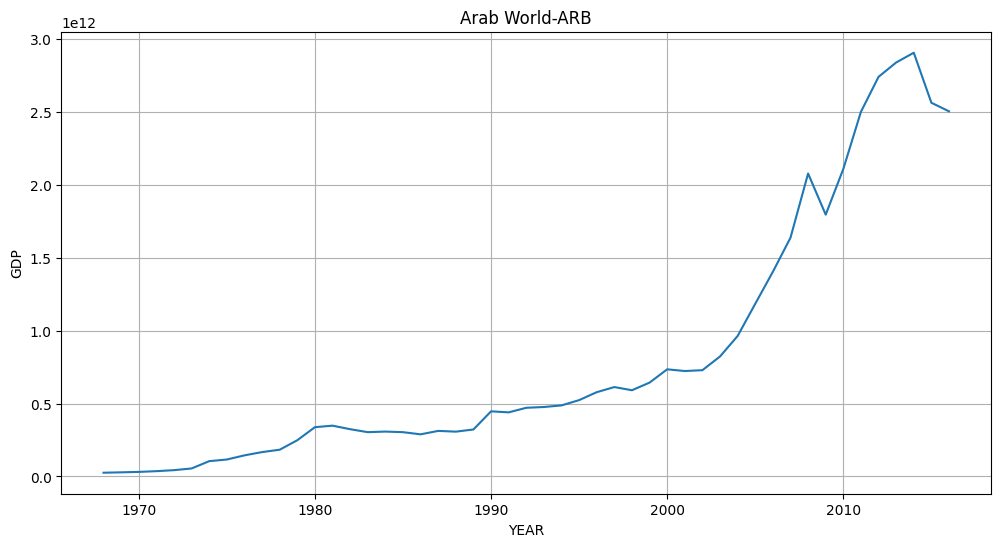

In [61]:
df_arb.plot(x = 'Year', y = 'Value', kind = 'line', figsize = (12,6), legend = False, grid = True, ylabel = 'GDP', xlabel = 'YEAR', title = 'Arab World-ARB')

## Finding GDP Change of Arab World

In [62]:
data = df_arb.values

gdp_change = [0]

for i in range(1,len(data)):
    
    prev = data[i-1][3]
    cur = data[i][3]
    
    gdp_change.append(round(((cur - prev) / prev)*100,2))
    
df_arb = df_arb.assign(GDP = gdp_change)

In [63]:
df_arb.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


## Finding GDP Change of Every Country

In [64]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [65]:
finalData = []
for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    data = df_pr.values
    lst = [0]
    for i in range(1, len(data)):
        lst.append(round((data[i][3] - data[i-1][3])/ data[i-1][3] *100, 2))
    df_pr = df_pr.assign(GDP = lst)
    finalData.append(df_pr)

In [66]:
df = pd.concat(finalData, axis = 0)
## axis = 0 for concatenating row-wise and axis = 1 for concatenating columns-wise 

In [67]:
df

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [68]:
df.groupby('Country Name').mean('GDP')

,Year,Value,GDP
Country Name,,,
Afghanistan,1986.5,6.226405e+09,11.204737
Albania,2000.0,6.011364e+09,8.232121
Algeria,1988.0,6.147467e+10,8.415614
American Samoa,2009.0,5.805333e+08,1.937333
Andorra,1993.0,1.468489e+09,8.817660
...,...,...,...
West Bank and Gaza,2005.0,6.648426e+09,7.273913
World,1988.0,2.609594e+13,7.454386
"Yemen, Rep.",2003.0,1.746357e+10,7.137037


In [69]:
df.groupby('Country Name').max()['Value'].sort_values(ascending = False)

Country Name
World                        7.904923e+13
High income                  5.036240e+13
OECD members                 4.937008e+13
Post-demographic dividend    4.673504e+13
IDA & IBRD total             2.948247e+13
                                 ...     
Palau                        3.102483e+08
Marshall Islands             1.944979e+08
Kiribati                     1.880457e+08
Nauru                        1.170204e+08
Tuvalu                       3.987575e+07
Name: Value, Length: 256, dtype: float64

## Plotting using Plotly

In [70]:
df_pr = df[df['Country Name']=='World']
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'World GDP')
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Year=%{x}<br>Value=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                          1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                          1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                          1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                          2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64),
              'xaxis': 'x',
              'y': array([1.36667831e+12, 1.42178795e+12, 1.52695537e+12, 1.64375176e+12,
                          1.80079600e+12, 1.96178030e+12, 2.12845048e+12, 2.26460048e+12,
                          2.44322391e+12, 2.69079771e+12, 2.95779968e+12, 3.26690709e+12,
                          3.76767387e+12, 4.59134593e+12, 5.29603161e+12, 5.89720537e+12,
                          6.41647308e+12, 7.25762696e+12, 8.54292474e+12, 9.92589744e+12,
                          1.11722037e+13, 1.14643515e+13, 1.13636465e+13, 1.16237106e+13,
                          1.20650681e+13, 1.26891546e+13, 1.50225832e+13, 1.70916950e+13,
                          1.91408140e+13, 2.00928251e+13, 2.25950077e+13, 2.39276317e+13,
                          2.54099516e+13, 2.58590445e+13, 2.77675117e+13, 3.08725870e+13,
                          3.15526799e+13, 3.14353876e+13, 3.13387803e+13, 3.25108340e+13,
                          3.35665682e+13, 3.33545487e+13, 3.46359644e+13, 3.88940587e+13,
                          4.38048237e+13, 4.74288945e+13, 5.13632396e+13, 5.78589706e+13,
                          6.34618099e+13, 6.01683470e+13, 6.59545320e+13, 7.32798623e+13,
                          7.48899465e+13, 7.69908573e+13, 7.90492306e+13, 7.47577452e+13,
                          7.58451094e+13]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'World GDP'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Value'}}}
})

In [71]:
df_pr = df[df['Country Name']=='India']
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'India GDP')
fig
# To save file we use following line of code
# pyo.plot(fig, filename = 'India.html')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Year=%{x}<br>Value=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                          1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                          1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                          1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                          2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64),
              'xaxis': 'x',
              'y': array([3.65359250e+10, 3.87090961e+10, 4.15990702e+10, 4.77760009e+10,
                          5.57268731e+10, 5.87604247e+10, 4.52536413e+10, 4.94661689e+10,
                          5.23773243e+10, 5.76683300e+10, 6.15898005e+10, 6.64525619e+10,
                          7.05099130e+10, 8.43745416e+10, 9.81982769e+10, 9.71592220e+10,
                          1.01346972e+11, 1.19866747e+11, 1.35468783e+11, 1.50950827e+11,
                          1.83839865e+11, 1.90909549e+11, 1.98037713e+11, 2.15350771e+11,
                          2.09328157e+11, 2.29410294e+11, 2.45664654e+11, 2.75311425e+11,
                          2.92632656e+11, 2.92093308e+11, 3.16697338e+11, 2.66502281e+11,
                          2.84363884e+11, 2.75570363e+11, 3.22909902e+11, 3.55475984e+11,
                          3.87656018e+11, 4.10320300e+11, 4.15730874e+11, 4.52699998e+11,
                          4.62146799e+11, 4.78965491e+11, 5.08068952e+11, 5.99592902e+11,
                          6.99688853e+11, 8.08901077e+11, 9.20316530e+11, 1.20111177e+12,
                          1.18695276e+12, 1.32394030e+12, 1.65661707e+12, 1.82304993e+12,
                          1.82763786e+12, 1.85672212e+12, 2.03539346e+12, 2.08986541e+12,
                          2.26379250e+12]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'India GDP'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Value'}}}
})

Plotting GDP of Each Country using Plotly

In [72]:
# Making a new directory for storing plots
# os.mkdir("GDP Individual")
for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name']==country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + ' GDP')
    # Saves the plots in the directory accordingly
    # pyo.plot(fig, filename = 'GDP Individual/' + country_name + ' GDP.html', auto_open = False)

GDP of each country WRT World's GDP Range(80 Trillion)

In [73]:
# Making a new directory for storing plots
# os.mkdir("GDP Individual WRT World")
for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name']==country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + ' GDP', range_y = [0, 8000000000000000])
    # Saves the plots in the directory accordingly
    # pyo.plot(fig, filename = 'GDP Individual WRT World/' + country_name + ' GDP.html', auto_open = False)

GDP of all Countries

In [74]:
fig = px.line(df, x = 'Year', y = 'Value', title = 'GDP Analysis of all COuntries', color = 'Country Name')
fig
# To save file
# pyo.plot(fig, filename = 'GDP Countries.html')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Country Name=Arab World<br>Year=%{x}<br>Value=%{y}<extra></extra>',
              'legendgroup': 'Arab World',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Arab World',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
                          1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
                          1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
                          2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
                          2016], dtype=int64),
              'xaxis': 'x',
              'y': array([2.57606830e+10, 2.84342036e+10, 3.13854997e+10, 3.64269099e+10,
                          4.33160566e+10, 5.50183949e+10, 1.05145803e+11, 1.16337022e+11,
                          1.44846175e+11, 1.67308328e+11, 1.83555544e+11, 2.48646206e+11,
                          3.38177455e+11, 3.48592795e+11, 3.24328754e+11, 3.03962540e+11,
                          3.07940772e+11, 3.03893618e+11, 2.89029151e+11, 3.12681678e+11,
                          3.07503036e+11, 3.22325140e+11, 4.46877162e+11, 4.39779178e+11,
                          4.71163515e+11, 4.76513631e+11, 4.87526906e+11, 5.23759898e+11,
                          5.78231298e+11, 6.13279452e+11, 5.91525594e+11, 6.43889671e+11,
                          7.35025140e+11, 7.23282816e+11, 7.29051715e+11, 8.23110541e+11,
                          9.63862341e+11, 1.18466155e+12, 1.40411353e+12, 1.63757320e+12,
                          2.07811566e+12, 1.79581961e+12, 2.10964582e+12, 2.50155365e+12,
                          2.74123854e+12, 2.83962664e+12, 2.90661644e+12, 2.56330173e+12,
                          2.50470263e+12]),
              'yaxis': 'y'},
             {'hovertemplate': 'Country Name=Caribbean small states<br>Year=%{x}<br>Value=%{y}<extra></extra>',
              'legendgroup': 'Caribbean small states',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Caribbean small states',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                          1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                          1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                          1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                          2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64),
              'xaxis': 'x',
              'y': array([2.00478509e+09, 2.16973305e+09, 2.28949462e+09, 2.43159178e+09,
                          2.62689591e+09, 2.82861545e+09, 3.06784365e+09, 3.29314501e+09,
                          3.27464564e+09, 3.56368763e+09, 3.92085318e+09, 4.26267322e+09,
                          4.93473994e+09, 5.39081607e+09, 7.00790686e+09, 8.20000122e+09,
                          8.41480720e+09, 9.78347192e+09, 9.98060402e+09, 1.14351296e+10,
                          1.40282820e+10, 1.54800501e+10, 1.72871468e+10, 1.74504569e+10,
                          1.64362542e+10, 1.61613161e+10, 1.44451458e+10, 1.54753461e+10,
                          1.63997951e+10, 1.66319543e+10, 1.78844328e+10, 1.76684897e+10,
                          1.73969504e+10, 1.82546272e+10, 1.92896056e+10, 2.11348550e+10,
                          2.30417925e+10, 2.57320979e+10, 2.82498560e+10, 3.00223205e+10,
                          3.22566638e+10, 3.31769311e+10, 3.49494443e+10, 3.75008260e+10,
                          4.11789843e+10, 4.66561140e+10, 

Comparing GDP Growth of 2 countries

In [75]:
c1 = df[df['Country Name']=='China']
c2 = df[df['Country Name']=='India']

In [76]:
df_new = pd.concat([c1, c2], axis = 0)
df_new.head()

,Country Name,Country Code,Year,Value,GDP
4046,China,CHN,1960,5.971647e+10,0.00
4047,China,CHN,1961,5.005687e+10,-16.18
4048,China,CHN,1962,4.720936e+10,-5.69
4049,China,CHN,1963,5.070680e+10,7.41
4050,China,CHN,1964,5.970834e+10,17.75


In [77]:
fig = px.line(df_new, x = 'Year', y = 'Value', title = 'GDP Analysis of India & China', color = 'Country Name')
fig
# To save file
# pyo.plot(fig, filename = 'GDP Countries.html')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Country Name=China<br>Year=%{x}<br>Value=%{y}<extra></extra>',
              'legendgroup': 'China',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'China',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                          1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                          1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                          1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                          2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64),
              'xaxis': 'x',
              'y': array([5.97164676e+10, 5.00568690e+10, 4.72093590e+10, 5.07067999e+10,
                          5.97083435e+10, 7.04362661e+10, 7.67202860e+10, 7.28816313e+10,
                          7.08465351e+10, 7.97059062e+10, 9.26029734e+10, 9.98009586e+10,
                          1.13687586e+11, 1.38544285e+11, 1.44182133e+11, 1.63431552e+11,
                          1.53940455e+11, 1.74938099e+11, 1.49540753e+11, 1.78280594e+11,
                          1.91149212e+11, 1.95866382e+11, 2.05089700e+11, 2.30686747e+11,
                          2.59946511e+11, 3.09488028e+11, 3.00758100e+11, 2.72972975e+11,
                          3.12353631e+11, 3.47768051e+11, 3.60857913e+11, 3.83373318e+11,
                          4.26915713e+11, 4.44731282e+11, 5.64324670e+11, 7.34547898e+11,
                          8.63746718e+11, 9.61603953e+11, 1.02904310e+12, 1.09399727e+12,
                          1.21134687e+12, 1.33939572e+12, 1.47055002e+12, 1.66028797e+12,
                          1.95534700e+12, 2.28596589e+12, 2.75213177e+12, 3.55218231e+12,
                          4.59820609e+12, 5.10995361e+12, 6.10062049e+12, 7.57255384e+12,
                          8.56054731e+12, 9.60722448e+12, 1.04823721e+13, 1.10646663e+13,
                          1.11991452e+13]),
              'yaxis': 'y'},
             {'hovertemplate': 'Country Name=India<br>Year=%{x}<br>Value=%{y}<extra></extra>',
              'legendgroup': 'India',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'India',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                          1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                          1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                          1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                          2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64),
              'xaxis': 'x',
              'y': array([3.65359250e+10, 3.87090961e+10, 4.15990702e+10, 4.77760009e+10,
                          5.57268731e+10, 5.87604247e+10, 4.52536413e+10, 4.94661689e+10,
                          5.23773243e+10, 5.76683300e+10, 6.15898005e+10, 6.64525619e+10,
                          7.05099130e+10, 8.43745416e+10, 9.81982769e+10, 9.71592220e+10,
                          1.01346972e+11, 1.19866747e+11, 1.35468783e+11, 1.50950827e+11,
                          1.83839865e+11, 1.90909549e+11, 1.98037713e+11, 2.15350771e+11,
                          2.09328157e+11, 2.29410294e+11, 2.45664654e+11, 2.75311425e+11,
                          2.92632656e+11, 2.92093308e+11, 3.16697338e+11, 2.66502281e+11,
                          2.84363884e+11, 2.75570363e+11, 3.22909902e+11, 3.55475984e+11,
            

## Compare GDP across Countries Advanced

In [78]:
lst = ['IND', 'ITA', 'CHN', 'USA']
dfs = []
for i in lst:
    dfs.append(df[df['Country Code'] == i])
    df_pr = pd.concat(dfs, axis = 0)
df_pr.head()

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64


In [79]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison of ' + '|'.join(lst), color = 'Country Name')
fig
# To save file
# pyo.plot(fig, filename = '|'.join(lst) + '.html')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Country Name=India<br>Year=%{x}<br>Value=%{y}<extra></extra>',
              'legendgroup': 'India',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'India',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                          1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                          1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                          1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                          2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64),
              'xaxis': 'x',
              'y': array([3.65359250e+10, 3.87090961e+10, 4.15990702e+10, 4.77760009e+10,
                          5.57268731e+10, 5.87604247e+10, 4.52536413e+10, 4.94661689e+10,
                          5.23773243e+10, 5.76683300e+10, 6.15898005e+10, 6.64525619e+10,
                          7.05099130e+10, 8.43745416e+10, 9.81982769e+10, 9.71592220e+10,
                          1.01346972e+11, 1.19866747e+11, 1.35468783e+11, 1.50950827e+11,
                          1.83839865e+11, 1.90909549e+11, 1.98037713e+11, 2.15350771e+11,
                          2.09328157e+11, 2.29410294e+11, 2.45664654e+11, 2.75311425e+11,
                          2.92632656e+11, 2.92093308e+11, 3.16697338e+11, 2.66502281e+11,
                          2.84363884e+11, 2.75570363e+11, 3.22909902e+11, 3.55475984e+11,
                          3.87656018e+11, 4.10320300e+11, 4.15730874e+11, 4.52699998e+11,
                          4.62146799e+11, 4.78965491e+11, 5.08068952e+11, 5.99592902e+11,
                          6.99688853e+11, 8.08901077e+11, 9.20316530e+11, 1.20111177e+12,
                          1.18695276e+12, 1.32394030e+12, 1.65661707e+12, 1.82304993e+12,
                          1.82763786e+12, 1.85672212e+12, 2.03539346e+12, 2.08986541e+12,
                          2.26379250e+12]),
              'yaxis': 'y'},
             {'hovertemplate': 'Country Name=Italy<br>Year=%{x}<br>Value=%{y}<extra></extra>',
              'legendgroup': 'Italy',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Italy',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                          1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                          1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                          1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                          2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64),
              'xaxis': 'x',
              'y': array([4.03852883e+10, 4.48427603e+10, 5.03838919e+10, 5.77107431e+10,
                          6.31754170e+10, 6.79781539e+10, 7.36548700e+10, 8.11331201e+10,
                          8.79422317e+10, 9.70850828e+10, 1.13021272e+11, 1.24261125e+11,
                          1.44780888e+11, 1.74913182e+11, 1.98906211e+11, 2.26944777e+11,
                          2.23976031e+11, 2.56746610e+11, 3.14019078e+11, 3.92378585e+11,
                          4.75682506e+11, 4.29282143e+11, 4.25863252e+11, 4.41580963e+11,
                          4.36443281e+11, 4.50725816e+11, 6.38273986e+11, 8.03055419e+11,
                          8.88667913e+11, 9.25598068e+11, 1.17732629e+12, 1.24210940e+12,
                          1.31580699e+12, 1.06144523e+12, 1.09559083e+12, 1.17078735e+12,
            

A function to automate the plotting process

In [80]:
def compareGdp(lst, isOpen):
    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])
        df_pr = pd.concat(dfs, axis = 0)
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison of ' + '|'.join(lst), color = 'Country Name')
    # To save file
    # pyo.plot(fig, filename = '|'.join(lst) + '.html', auto_open = isOpen)
    return fig

In [81]:
compareGdp(["IND", "USA"], False)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Country Name=India<br>Year=%{x}<br>Value=%{y}<extra></extra>',
              'legendgroup': 'India',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'India',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                          1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                          1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                          1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                          2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64),
              'xaxis': 'x',
              'y': array([3.65359250e+10, 3.87090961e+10, 4.15990702e+10, 4.77760009e+10,
                          5.57268731e+10, 5.87604247e+10, 4.52536413e+10, 4.94661689e+10,
                          5.23773243e+10, 5.76683300e+10, 6.15898005e+10, 6.64525619e+10,
                          7.05099130e+10, 8.43745416e+10, 9.81982769e+10, 9.71592220e+10,
                          1.01346972e+11, 1.19866747e+11, 1.35468783e+11, 1.50950827e+11,
                          1.83839865e+11, 1.90909549e+11, 1.98037713e+11, 2.15350771e+11,
                          2.09328157e+11, 2.29410294e+11, 2.45664654e+11, 2.75311425e+11,
                          2.92632656e+11, 2.92093308e+11, 3.16697338e+11, 2.66502281e+11,
                          2.84363884e+11, 2.75570363e+11, 3.22909902e+11, 3.55475984e+11,
                          3.87656018e+11, 4.10320300e+11, 4.15730874e+11, 4.52699998e+11,
                          4.62146799e+11, 4.78965491e+11, 5.08068952e+11, 5.99592902e+11,
                          6.99688853e+11, 8.08901077e+11, 9.20316530e+11, 1.20111177e+12,
                          1.18695276e+12, 1.32394030e+12, 1.65661707e+12, 1.82304993e+12,
                          1.82763786e+12, 1.85672212e+12, 2.03539346e+12, 2.08986541e+12,
                          2.26379250e+12]),
              'yaxis': 'y'},
             {'hovertemplate': 'Country Name=United States<br>Year=%{x}<br>Value=%{y}<extra></extra>',
              'legendgroup': 'United States',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'United States',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                          1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                          1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                          1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                          2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64),
              'xaxis': 'x',
              'y': array([5.4330000e+11, 5.6330000e+11, 6.0510000e+11, 6.3860000e+11,
                          6.8580000e+11, 7.4370000e+11, 8.1500000e+11, 8.6170000e+11,
                          9.4250000e+11, 1.0199000e+12, 1.0758840e+12, 1.1677700e+12,
                          1.2824490e+12, 1.4285490e+12, 1.5488250e+12, 1.6889230e+12,
                          1.8775870e+12, 2.0859510e+12, 2.3565710e+12, 2.6321430e+12,
                          2.8625050e+12, 3.2109560e+12, 3.3449910e+12, 3.6381370e+12,
                          4.0406930e+12, 4.3467340e+12, 4.5901550e+12, 4.8702170e+12,
                          5.2526290e+12, 5.6576930e+12, 5.9795890e+12, 6.1740430e+12,
                          6.5392990e+12, 6.8787180e+12, 7.3087550e+12, 7.6640600e+12,
                        

## Compare GDP Growth Comparison

In [82]:
def compareGdpGrowth(lst, isOpen):
    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])
        df_pr = pd.concat(dfs, axis = 0)
    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Comparison of ' + '|'.join(lst), color = 'Country Name')
    # To save file
    # pyo.plot(fig, filename = '|'.join(lst) + '.html', auto_open = isOpen)
    return fig

In [83]:
compareGdpGrowth(['IND', 'USA'], False)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Country Name=India<br>Year=%{x}<br>GDP=%{y}<extra></extra>',
              'legendgroup': 'India',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'India',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                          1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                          1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                          1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                          2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64),
              'xaxis': 'x',
              'y': array([  0.  ,   5.95,   7.47,  14.85,  16.64,   5.44, -22.99,   9.31,   5.89,
                           10.1 ,   6.8 ,   7.9 ,   6.11,  19.66,  16.38,  -1.06,   4.31,  18.27,
                           13.02,  11.43,  21.79,   3.85,   3.73,   8.74,  -2.8 ,   9.59,   7.09,
                           12.07,   6.29,  -0.18,   8.42, -15.85,   6.7 ,  -3.09,  17.18,  10.09,
                            9.05,   5.85,   1.32,   8.89,   2.09,   3.64,   6.08,  18.01,  16.69,
                           15.61,  13.77,  30.51,  -1.18,  11.54,  25.13,  10.05,   0.25,   1.59,
                            9.62,   2.68,   8.32]),
              'yaxis': 'y'},
             {'hovertemplate': 'Country Name=United States<br>Year=%{x}<br>GDP=%{y}<extra></extra>',
              'legendgroup': 'United States',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'United States',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                          1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                          1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                          1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                          2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64),
              'xaxis': 'x',
              'y': array([ 0.  ,  3.68,  7.42,  5.54,  7.39,  8.44,  9.59,  5.73,  9.38,  8.21,
                           5.49,  8.54,  9.82, 11.39,  8.42,  9.05, 11.17, 11.1 , 12.97, 11.69,
                           8.75, 12.17,  4.17,  8.76, 11.06,  7.57,  5.6 ,  6.1 ,  7.85,  7.71,
                           5.69,  3.25,  5.92,  5.19,  6.25,  4.86,  5.69,  6.28,  5.58,  6.29,
                           6.46,  3.28,  3.35,  4.86,  6.64,  6.67,  5.82,  4.49,  1.66, -2.04,
                           3.78,  3.7 ,  4.11,  3.32,  4.2 ,  4.18,  2.78]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'Country Name'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'GDP Comparison of IND|USA'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'GDP'}}}
})

## GDP Growth Between 1960 and 2016

In [85]:
dfs = []
for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name']==country_name]
    if(len(df_pr)==57): # 57 because 2016 - 1960 = 57, because we have missing data for some countries in the dataset
        dfs.append(df_pr)

In [88]:
df_new = pd.concat(dfs, axis = 0)
df_new.head()

,Country Name,Country Code,Year,Value,GDP
49,Caribbean small states,CSS,1960,2.004785e+09,0.00
50,Caribbean small states,CSS,1961,2.169733e+09,8.23
51,Caribbean small states,CSS,1962,2.289495e+09,5.52
52,Caribbean small states,CSS,1963,2.431592e+09,6.21
53,Caribbean small states,CSS,1964,2.626896e+09,8.03


In [93]:
fig = px.line(df_new, x = 'Year', y = 'GDP', title = 'GDP Comaprison from 1960 to 2016', color = 'Country Name')
fig
# To save the graph run the next line of code
# pyo.plot(fig, filename = 'GDP Growth between 1960 & 2016.html', auto_open = True)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Country Name=Caribbean small states<br>Year=%{x}<br>GDP=%{y}<extra></extra>',
              'legendgroup': 'Caribbean small states',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Caribbean small states',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                          1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                          1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                          1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                          2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64),
              'xaxis': 'x',
              'y': array([  0.  ,   8.23,   5.52,   6.21,   8.03,   7.68,   8.46,   7.34,  -0.56,
                            8.83,  10.02,   8.72,  15.77,   9.24,  30.  ,  17.01,   2.62,  16.26,
                            2.01,  14.57,  22.68,  10.35,  11.67,   0.94,  -5.81,  -1.67, -10.62,
                            7.13,   5.97,   1.42,   7.53,  -1.21,  -1.54,   4.93,   5.67,   9.57,
                            9.02,  11.68,   9.78,   6.27,   7.44,   2.85,   5.34,   7.3 ,   9.81,
                           13.3 ,  12.35,  11.36,  14.09, -16.08,   9.05,   8.62,   6.72,   0.9 ,
                            0.15,  -2.63,  -4.04]),
              'yaxis': 'y'},
             {'hovertemplate': 'Country Name=Early-demographic dividend<br>Year=%{x}<br>GDP=%{y}<extra></extra>',
              'legendgroup': 'Early-demographic dividend',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Early-demographic dividend',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                          1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                          1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                          1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                          2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64),
              'xaxis': 'x',
              'y': array([ 0.  ,  0.61,  3.66,  5.77, 14.55,  9.02, -1.3 ,  4.94,  8.36, 11.78,
                           6.  ,  8.02,  9.95, 27.99, 40.29,  7.39,  9.2 , 11.89, 10.7 , 21.56,
                          23.2 , 11.74, -4.7 ,  0.93, -1.45,  2.39,  1.48,  0.77,  7.59,  2.2 ,
                          15.18,  5.99,  9.72,  9.76,  4.71,  2.07,  9.14,  6.78, -1.62,  6.1 ,
                           8.48, -1.25, -2.81, 11.83, 16.32, 16.56, 14.57, 18.79, 12.77, -3.71,
                          20.84, 12.34,  4.28,  1.87,  3.63, -3.18,  2.03]),
              'yaxis': 'y'},
             {'hovertemplate': 'Country Name=East Asia & Pacific<br>Year=%{x}<br>GDP=%{y}<extra></extra>',
              'legendgroup': 'East Asia & Pacific',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'East Asia & Pacific',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                          1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
                          1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
                          1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
                          2008, 2009, 2010, 2011, 2